In [1]:
# The code was removed by Watson Studio for sharing.

***
# <font color=grey>  Credit Default Analysis </font>
***

## <font color=grey> Import Libraries </font>

In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from numpy import std
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## <font color=grey> Load Data </font>

In [3]:
# The code was removed by Watson Studio for sharing.

,Birthdate,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,1990-06-20,70,Male,married,1,8,North,Country,1,176000,5009,28000,N
1,1974-04-16,41,Male,married,1,8,South,City,0,31000,4001,3200,N
2,1980-01-09,38,Male,married,1,11,North,City,0,55000,2169,40600,N
3,1974-10-04,32,Female,married,1,9,South,Country,0,120000,821,53000,Y
4,1981-10-05,40,Female,single,1,9,South,Country,1,28000,3057,17700,Y


## <font color=grey> Exploratory Data Analysis </font>

In [4]:
df.shape

(1913, 13)

In [5]:
df['Credit Default'].value_counts().to_frame()

,Credit Default
N,1193
Y,720


In [6]:
df = df.replace({'Y': 1})
df = df.replace({'N': 0})
df.head(3)

,Birthdate,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,1990-06-20,70,Male,married,1,8,North,Country,1,176000,5009,28000,0
1,1974-04-16,41,Male,married,1,8,South,City,0,31000,4001,3200,0
2,1980-01-09,38,Male,married,1,11,North,City,0,55000,2169,40600,0


In [7]:
df.describe()

,Age,Children,Customer Relationship Years,Credit Card,Income,Other Debt,Credit Amount,Credit Default
count,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,57.832201,0.514898,8.649242,0.161004,45500.784109,3051.677993,27953.685311,0.376372
std,23.696357,0.499909,2.286448,0.367630,36670.963232,3292.802430,17310.553419,0.484602
min,18.000000,0.000000,1.000000,0.000000,14000.000000,46.000000,1300.000000,0.000000
25%,39.000000,0.000000,8.000000,0.000000,24000.000000,1039.000000,10800.000000,0.000000
50%,56.000000,1.000000,9.000000,0.000000,34000.000000,1984.000000,28100.000000,0.000000
75%,77.000000,1.000000,11.000000,0.000000,55000.000000,3818.000000,43000.000000,1.000000
max,304.000000,1.000000,11.000000,1.000000,446000.000000,27034.000000,59900.000000,1.000000


## <font color=grey> Visualization</font>

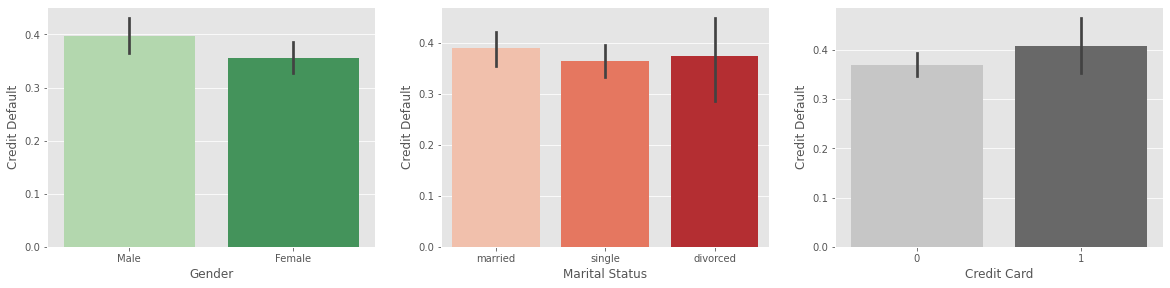

In [8]:
plt.figure(figsize=[20,15])

plt.subplot(331)
sns.barplot('Gender', 'Credit Default', data = df, palette = "Greens")

plt.subplot(332)
sns.barplot('Marital Status', 'Credit Default', data = df, palette = "Reds")

plt.subplot(333)
sns.barplot('Credit Card', 'Credit Default', data = df, palette = "Greys")

### <font color=black> Boxplot </font>

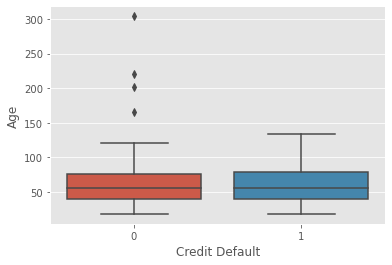

In [9]:
sns.boxplot(x="Credit Default", y="Age", data=df)

### <font color=black> Korrelation </font>

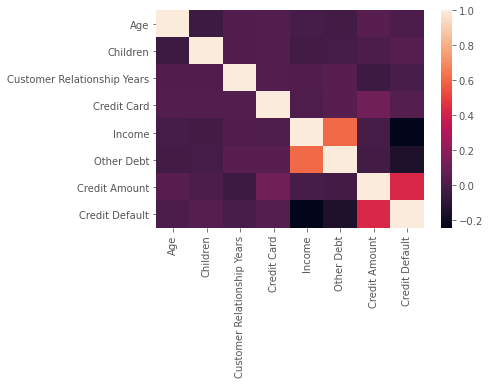

In [10]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

## <font color=grey> Missing Values </font>

In [11]:
df.isnull().sum()

Birthdate                        0
Age                              0
Gender                           0
Marital Status                 109
Children                         0
Customer Relationship Years      0
Region                           0
Area                             0
Credit Card                      0
Income                           0
Other Debt                       0
Credit Amount                    0
Credit Default                   0
dtype: int64

### <font color=black> Impute Missings </font>

In [12]:
#Familienstand
#Replace the missing by the most frequent 
df['Marital Status'].replace(np.nan, "999", inplace=True)

# reset index, because we droped two rows
df.reset_index(drop=True, inplace=True)

In [13]:
#Test: Are still missing values in the DF
df.isnull().values.any()

False

### <font color=Black> Encoding Categorial Data</font>

In [14]:
df.head()

,Birthdate,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,1990-06-20,70,Male,married,1,8,North,Country,1,176000,5009,28000,0
1,1974-04-16,41,Male,married,1,8,South,City,0,31000,4001,3200,0
2,1980-01-09,38,Male,married,1,11,North,City,0,55000,2169,40600,0
3,1974-10-04,32,Female,married,1,9,South,Country,0,120000,821,53000,1
4,1981-10-05,40,Female,single,1,9,South,Country,1,28000,3057,17700,1


In [15]:
#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes

In [16]:
df_encoded = df
numencode(df_encoded)
df_encoded.head(4)

,Birthdate,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,456,70,1,2,1,8,0,1,1,176000,5009,28000,0
1,137,41,1,2,1,8,1,0,0,31000,4001,3200,0
2,175,38,1,2,1,11,0,0,0,55000,2169,40600,0
3,141,32,0,2,1,9,1,1,0,120000,821,53000,1


### <font color=Black> Scaling</font>

In [17]:
df_encoded = df_encoded.drop('Birthdate', 1)
df_encoded.head(3)

,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,70,1,2,1,8,0,1,1,176000,5009,28000,0
1,41,1,2,1,8,1,0,0,31000,4001,3200,0
2,38,1,2,1,11,0,0,0,55000,2169,40600,0


In [18]:
#Standardize the data using a scaler object
names = df_encoded.columns
scaler = preprocessing.StandardScaler()
# Fit data to the scaler object
df_encoded_stand = scaler.fit_transform(df_encoded)
df_encoded_stand = pd.DataFrame(df_encoded_stand, columns=names)
df_encoded_stand.head()

,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Credit Default
0,0.513622,1.018466,-0.295656,0.970635,-0.284026,-1.050957,1.234401,2.282770,3.559583,0.594580,0.002676,-0.776866
1,-0.710514,1.018466,-0.295656,0.970635,-0.284026,0.951514,-0.810109,-0.438064,-0.395533,0.288378,-1.430350,-0.776866
2,-0.837149,1.018466,-0.295656,0.970635,1.028395,-1.050957,-0.810109,-0.438064,0.259107,-0.268133,0.730746,-0.776866
3,-1.090419,-0.981868,-0.295656,0.970635,0.153447,0.951514,1.234401,-0.438064,2.032090,-0.677618,1.447260,1.287224
4,-0.752726,-0.981868,0.928565,0.970635,0.153447,0.951514,1.234401,2.282770,-0.477363,0.001617,-0.592492,1.287224


## <font color=grey> Modeling </font>

In [19]:
#Transform data into vectors
Y = np.array(df_encoded['Credit Default'])
df_encoded_stand = df_encoded_stand.drop('Credit Default', 1)
X = np.array(df_encoded_stand)
print (X)
print (Y)

feature_mapping = {}
counter = 0
for x in df_encoded_stand.columns:
    feature_mapping[counter]=x
    counter = counter + 1

[[ 5.13622446e-01  1.01846634e+00 -2.95656159e-01 ...  3.55958301e+00
   5.94579795e-01  2.67621709e-03]
 [-7.10514361e-01  1.01846634e+00 -2.95656159e-01 ... -3.95532988e-01
   2.88377529e-01 -1.43035044e+00]
 [-8.37149203e-01  1.01846634e+00 -2.95656159e-01 ...  2.59106902e-01
  -2.68132938e-01  7.30746212e-01]
 ...
 [ 8.51315359e-01 -9.81868478e-01  9.28565124e-01 ... -5.86469623e-01
  -1.94620092e-01  7.77945500e-02]
 [ 1.52670118e+00 -9.81868478e-01  9.28565124e-01 ...  1.77276916e-01
   7.14842577e-02  1.68417121e+00]
 [ 1.48448957e+00  1.01846634e+00 -2.95656159e-01 ... -5.59192960e-01
  -7.85760577e-01  9.96549544e-01]]
[0 0 0 ... 0 1 0]


In [20]:
#Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## <font color=Black> Logistic Regression</font>

In [21]:
#Build a Logistic Regression Model
LR = LogisticRegression(C=0.44117647058823528, solver='liblinear').fit(X_train,Y_train)
LR.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(C=0.4411764705882353, solver='liblinear')>

In [22]:
# Model Evaluation
model = LR
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7983569828230023
Accuracy (test set): 0.7578397212543554
AUC: 0.7357723577235773
Precision: 0.6617647058823529
Recall: 0.6585365853658537
F1 Score: 0.6601466992665036


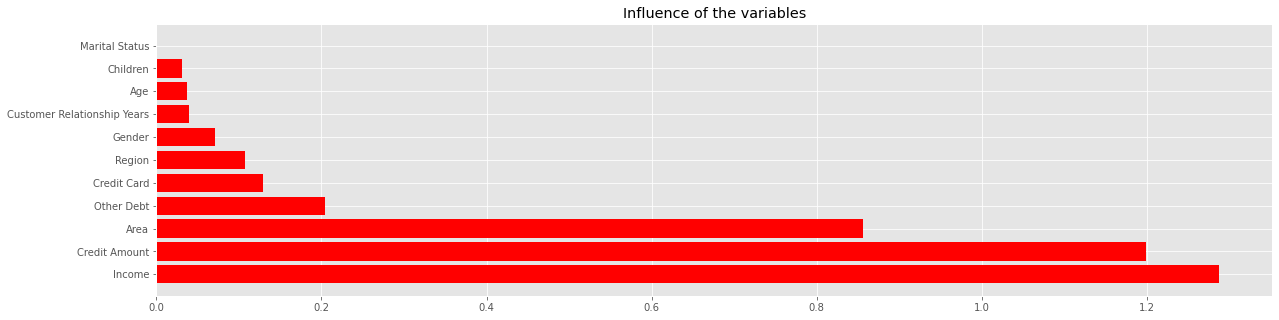

In [23]:
# Feature Importance
importances = LR.coef_
feature_list = []
label = []
value = []

for f in feature_mapping:
    feature_list.append((f, feature_mapping[f], abs(importances[0][f])))
feature_list.sort(key=lambda x: x[2], reverse=True)

for i in feature_list:
    label.append(i[1])
    value.append(i[2])

plt.figure(figsize=[20,5])
plt.title("Influence of the variables")
plt.barh(label, value, color="r", align="center")
plt.show()

## <font color=Black> Random Forest</font>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [25]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [26]:
# Model Evaluation
model = rf
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.7864077669902912
Accuracy (test set): 0.7543554006968641
AUC: 0.6929539295392954
Precision: 0.7424242424242424
Recall: 0.47804878048780486
F1 Score: 0.5816023738872403


## <font color=Black> Decision Tree</font>

In [27]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(min_samples_leaf=50, criterion="entropy", max_depth = 5)
dTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [28]:
dTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50)

In [29]:
# Model Evaluation
model = dTree
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.80134428678118
Accuracy (test set): 0.7735191637630662
AUC: 0.7371273712737129
Precision: 0.7142857142857143
Recall: 0.6097560975609756
F1 Score: 0.6578947368421052


### <font color=grey> Visualization Decision Tree</font>

In [30]:
!pip install graphviz

In [31]:
!pip install pydotplus

     |████████████████████████████████| 278 kB 13.0 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=ef0570d25a0f3a0381a6c19fe2a1beb8b88fce9e638ba61eaf48397d37d23793
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus


In [32]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(dTree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

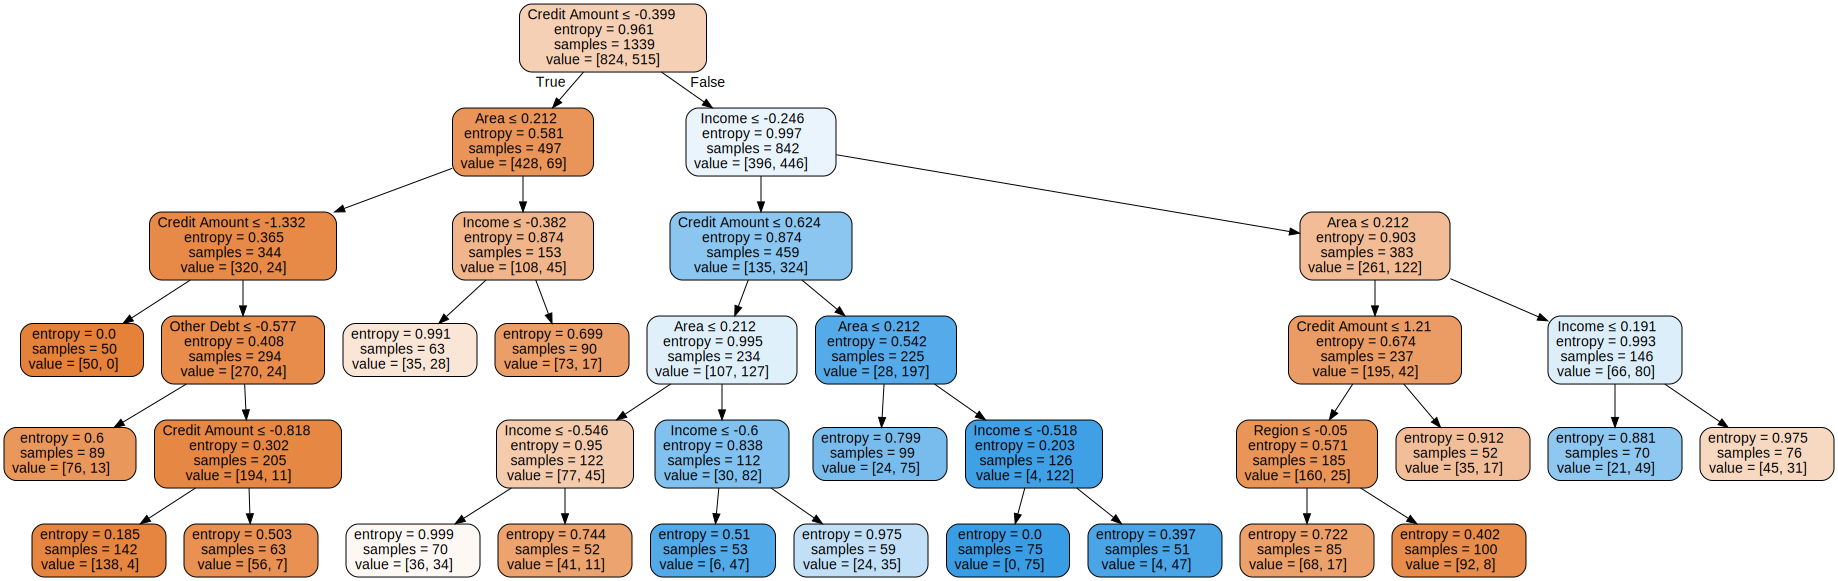

In [33]:
dot_data = tree.export_graphviz(dTree, out_file=None,
                                feature_names=df_encoded_stand.columns[0:17], 
                                filled=True, rounded=True,
                                special_characters=True)  
graph = graphviz.Source(dot_data)
graph 

## XGBoost

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb= XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=5, learning_rate=0.02, max_delta_step=0, max_depth=5,
       min_child_weight=5, missing=None, n_estimators=600, nthread=1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1.0)
xgb.fit(X_train, Y_train)

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.02, max_depth=5,
              min_child_weight=5, n_estimators=600, nthread=1, seed=0,
              silent=True, subsample=1.0)

In [36]:
# Modelevaluation
model = xgb
print ('Accuracy (train set):',metrics.accuracy_score(Y_train, model.predict(X_train)))
print ('Accuracy (test set):', metrics.accuracy_score(Y_test, model.predict(X_test) ))
print ('AUC:', roc_auc_score(Y_test, model.predict(X_test)))
print ('Precision:', metrics.precision_score(Y_test,model.predict(X_test)))
print ('Recall:', metrics.recall_score(Y_test, model.predict(X_test)))
print ('F1 Score:', metrics.f1_score(Y_test, model.predict(X_test)))

Accuracy (train set): 0.8267363704256908
Accuracy (test set): 0.7804878048780488
AUC: 0.7490514905149052
Precision: 0.7158469945355191
Recall: 0.6390243902439025
F1 Score: 0.6752577319587628


## Model Comparison

In [37]:
# Model Evaluation AUC
print ('AUC')
print ('Logistic Regression:', roc_auc_score(Y_test, LR.predict(X_test)))
print ('Random Forrest:', roc_auc_score(Y_test, rf.predict(X_test)))
print ('Decision Tree:', roc_auc_score(Y_test, dTree.predict(X_test)))
print ('XGBoost:', roc_auc_score(Y_test, xgb.predict(X_test)))

AUC
Logistic Regression: 0.7357723577235773
Random Forrest: 0.6929539295392954
Decision Tree: 0.7371273712737129
XGBoost: 0.7490514905149052


## <font color=grey> Scoring New Data </font>

In [38]:
body = client_d01f9b5de99e4731b707b425e3372df0.get_object(Bucket='creditdefault-donotdelete-pr-wdc0muzv46l4cb',Key='Credit Default NEW Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df1 = pd.read_csv(body)
df1.head()

,Birthdate,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount
0,1967-12-29,23,Male,married,1,8,South,City,0,28000,2586,43300
1,2003-08-23,82,Female,married,0,9,North,City,0,29000,2653,23900
2,1980-10-16,21,Male,married,1,8,North,City,0,26000,860,40000
3,1982-02-11,74,Female,single,0,10,North,City,0,26000,893,14000
4,1985-11-23,65,Male,single,0,11,South,City,0,44000,3055,2900


In [39]:
#Dataprep
df1 = df1.drop(['Birthdate'], axis =1)

#implement a viable data encoding
def numencode(Inputdaten):
    CatDaten = Inputdaten.select_dtypes(include=['object'])
    columns=[]
    columns = CatDaten.columns.values
    for col in columns:
        col = str(col)
        Inputdaten[col]=pd.Categorical(Inputdaten[col])
        Inputdaten[col]=Inputdaten[col].cat.codes
df_enc = df1
numencode(df_enc)

#standardize the data using a scaler object
names = df_enc.columns
scaler = preprocessing.StandardScaler()
# Fit data to the scaler object
dfnew = scaler.fit_transform(df_enc)
dfnew = pd.DataFrame(dfnew, columns=names)

In [40]:
X1 = np.array(dfnew[['Age', 'Gender', 'Marital Status', 'Children', 'Customer Relationship Years',
                 'Region', 'Area', 'Credit Card', 'Income', 'Other Debt', 'Credit Amount']])

In [41]:
predict = xgb.predict(X1)

In [42]:
proba = xgb.predict_proba(X1)[:,1]

In [43]:
df1['Prediction'] = predict
df1['Probability'] = proba
df1.head()

,Age,Gender,Marital Status,Children,Customer Relationship Years,Region,Area,Credit Card,Income,Other Debt,Credit Amount,Prediction,Probability
0,23,1,1,1,8,1,0,0,28000,2586,43300,1,0.573770
1,82,0,1,0,9,0,0,0,29000,2653,23900,0,0.235660
2,21,1,1,1,8,0,0,0,26000,860,40000,1,0.605414
3,74,0,2,0,10,0,0,0,26000,893,14000,0,0.144030
4,65,1,2,0,11,1,0,0,44000,3055,2900,0,0.039412


## <font color=grey> Deployment into Watson Machine Learning </font>

In [44]:
# The code was removed by Watson Studio for sharing.

In [45]:
# The code was removed by Watson Studio for sharing.

'SUCCESS'

In [48]:
# Test: Show Data Assets
# client.data_assets.list()

In [49]:
#Show Supported Frameworks
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029a-cc97-56da-b8e0-39c3880dbbe7  base
tensorflow_2.1-py3.6           1eb25b8

In [50]:
import sklearn as skl
skl.__version__

'0.23.1'

In [51]:
#Specify ML Model and Save it into WML
sofware_spec_uid = client.software_specifications.get_id_by_name("default_py3.7")

metadata = {
            client.repository.ModelMetaNames.NAME: 'Decison Tree',
            client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23',
            client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: sofware_spec_uid
}

published_model = client.repository.store_model(
    model=dTree,
    meta_props=metadata,
    training_data=df_encoded_stand,
    training_target=df['Credit Default'])

In [254]:
#Show all deployed ML Models
models_details = client.repository.list_models()

------------------------------------  -------------------------------------------------  ------------------------  -----------------
ID                                    NAME                                               CREATED                   TYPE
c7236b29-8dac-40d4-aede-59989e4e6ee5  SPSS CHAID                                         2020-12-01T15:52:31.002Z  pmml_4.2
54b1667f-db58-4e75-b11e-6dbd4cd6c914  SPSS Scoring Stream                                2020-12-01T15:51:29.002Z  spss-modeler_18.2
ae72e23a-2351-4fc1-97dc-dd7b5e578db6  Decison Tree                                       2020-12-01T13:33:16.002Z  scikit-learn_0.23
221e2013-bcc2-43d7-8c73-195ea1fc5277  AutoAI Credit Deafult - P3 XGBClassifierEstimator  2020-12-01T13:23:14.002Z  wml-hybrid_0.1
------------------------------------  -------------------------------------------------  ------------------------  -----------------


### Prepare Scoring Payload

In [52]:
# Select one customer (as Numpy Array)
input = X_test[0]
input

array([ 0.59804567, -0.98186848,  0.92856512,  0.97063483, -0.72150035,
       -1.05095692, -0.81010929, -0.43806428, -0.45008631, -0.52482035,
        1.27968788])

In [55]:
# Predict Credit Default
dTree.predict(input.reshape(-1, 11))

array([1])

In [57]:
# Predict Credit Default
dTree.predict_proba(input.reshape(-1, 11))[:,1]

array([0.75757576])

In [58]:
import json
scoring_values = input.tolist()
scoring_payload = {"input_data": [{"values": [scoring_values]}]}
print(json.dumps(scoring_payload))

{"input_data": [{"values": [[0.5980456745543409, -0.9818684781674637, 0.9285651235273367, 0.9706348333412682, -0.7215003481206084, -1.0509569215934138, -0.8101092866256109, -0.4380642778479885, -0.45008631212788214, -0.5248203526500789, 1.2796878756863053]]}]}


Score with a Dataframe
Xtest = pd.DataFrame(data=X_test)
Xtest.iloc[0:1]
import json
scoring_values = Xtest.iloc[0:1].values.tolist()
scoring_payload = {"input_data": [{"values": scoring_values}]}
print(json.dumps(scoring_payload))

## Realtime Scoring of a deployed Decision Tree Model

In [59]:
# The code was removed by Watson Studio for sharing.

Scoring response
{'predictions': [{'fields': ['prediction', 'probability'], 'values': [[1, [0.24242424242424243, 0.7575757575757576]]]}]}
